In [5]:
import pylab
import pandas as pd
# df = pd.read_csv("slt.txt", sep=" ")
df2 = pd.read_csv("/home/wg25r/flowsam/SLT-Net/eval/.ours/ours_TestDataset_per_sq_result.txt", sep=" ")

In [2]:
zoomnext = [{"Sm": 0.734, "wFm": 0.476, "meanEm": 0.497, "MAE": 0.010, "meanDic": 0.497, "meanIoU": 0.422}]
df3 = pd.DataFrame(zoomnext)

In [3]:
df3["Model"] = "ZoomNet"

df2 = df2[df2["(Dataset)"] == "(TestDataset_per_sq)"]
df2["Model"] = "Test"
df2 = df2[df3.columns]
# df4 = pd.read_csv("Pred_TrainDataset_per_sq_result.txt", sep=" ")
# df4 = df4[df4["(Dataset)"] == "(TrainDataset_per_sq)"]
# df4["Model"] = "Train"
# df4 = df4[df3.columns]
# whole = pd.concat([df3, df2, df4], axis=0)

In [ ]:
df2[(df2["Sm"] > 0.2) & (df2["meanIoU"] < 0.1)]

,(Dataset),wFm,Sm,meanEm,MAE,meanDic,meanIoU,maxEm,maxDice,maxIoU,meanSen,maxSen,meanSpe,maxSpe
12,(pygmy_seahorse_0),0.0,0.486,0.859,0.006,0.0,0.0,0.859,0.0,0.0,0.0,0.0,0.0,0.0


: 

Text(0, 0.5, 'meanIoU')

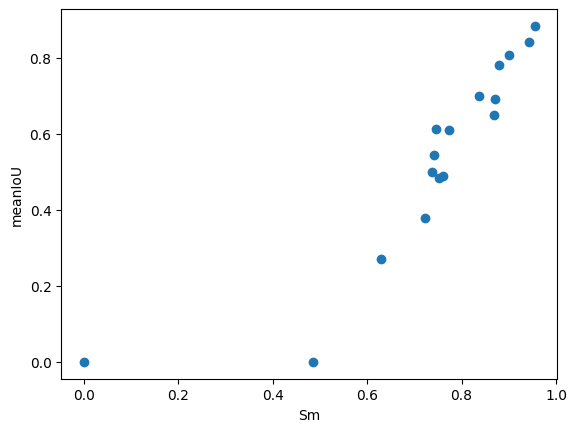

In [9]:
pylab.scatter(df2["Sm"], df2["meanIoU"])
pylab.xlabel("Sm")
pylab.ylabel("meanIoU")

In [14]:
df2[df2["(Dataset)"] == "(TestDataset_per_sq)"]

,(Dataset),wFm,Sm,meanEm,MAE,meanDic,meanIoU,maxEm,maxDice,maxIoU,meanSen,maxSen,meanSpe,maxSpe,Model
0,(TestDataset_per_sq),0.592,0.759,0.84,0.008,0.611,0.519,0.84,0.611,0.519,0.641,0.641,0.837,0.837,Test


In [15]:
df2["meanEm"].mean()

0.84

In [ ]:
dirs = ['no_motion_0.03', 'no_motion_0.05', 'no_motion_0.07', 'no_motion_0.09', 'no_motion_0.11', 'no_motion_0.13']
import os
files = [os.path.join(i, os.listdir(i)[0]) for i in dirs]

In [4]:
import pandas as pd
f2 = pd.read_csv("nomotion.2.csv", sep=" ")


In [9]:
f2[f2["meanIoU"] == f2["meanIoU"].max()]

,(Dataset),wFm,Sm,meanEm,MAE,meanDic,meanIoU,maxEm,maxDice,maxIoU,meanSen,maxSen,meanSpe,maxSpe
3,(TestDataset_per_sq),0.341,0.642,0.652,0.012,0.361,0.298,0.652,0.361,0.298,0.411,0.411,0.518,0.518


In [1]:
import pandas as pd
all_in_one = pd.read_csv("all_in_one.csv", sep=",")
no_bgs = all_in_one[all_in_one["(model)"].str.contains("no_bgs")]
max_iou = no_bgs["seq_meanIoU"].max()
no_bgs[no_bgs["seq_meanIoU"] == max_iou]

,(model),seq_wFm,seq_Sm,seq_meanEm,seq_MAE,seq_meanDic,seq_meanIoU,seq_maxEm,seq_maxDice,seq_maxIoU,seq_meanSen,seq_maxSen,seq_meanSpe,seq_maxSpe
155,(no_bgs_full_0.13),0.578,0.750,0.824,0.008,0.599,0.513,0.824,0.599,0.513,0.638,0.638,0.777,0.777


In [2]:
no_tracking = all_in_one[all_in_one["(model)"].str.contains("rerun_")]
max_iou = no_tracking["seq_meanIoU"].max()
no_tracking[no_tracking["seq_meanIoU"] == max_iou]

,(model),seq_wFm,seq_Sm,seq_meanEm,seq_MAE,seq_meanDic,seq_meanIoU,seq_maxEm,seq_maxDice,seq_maxIoU,seq_meanSen,seq_maxSen,seq_meanSpe,seq_maxSpe
183,(rerun_0.13),0.598,0.759,0.843,0.008,0.610,0.522,0.843,0.610,0.522,0.633,0.633,0.801,0.801


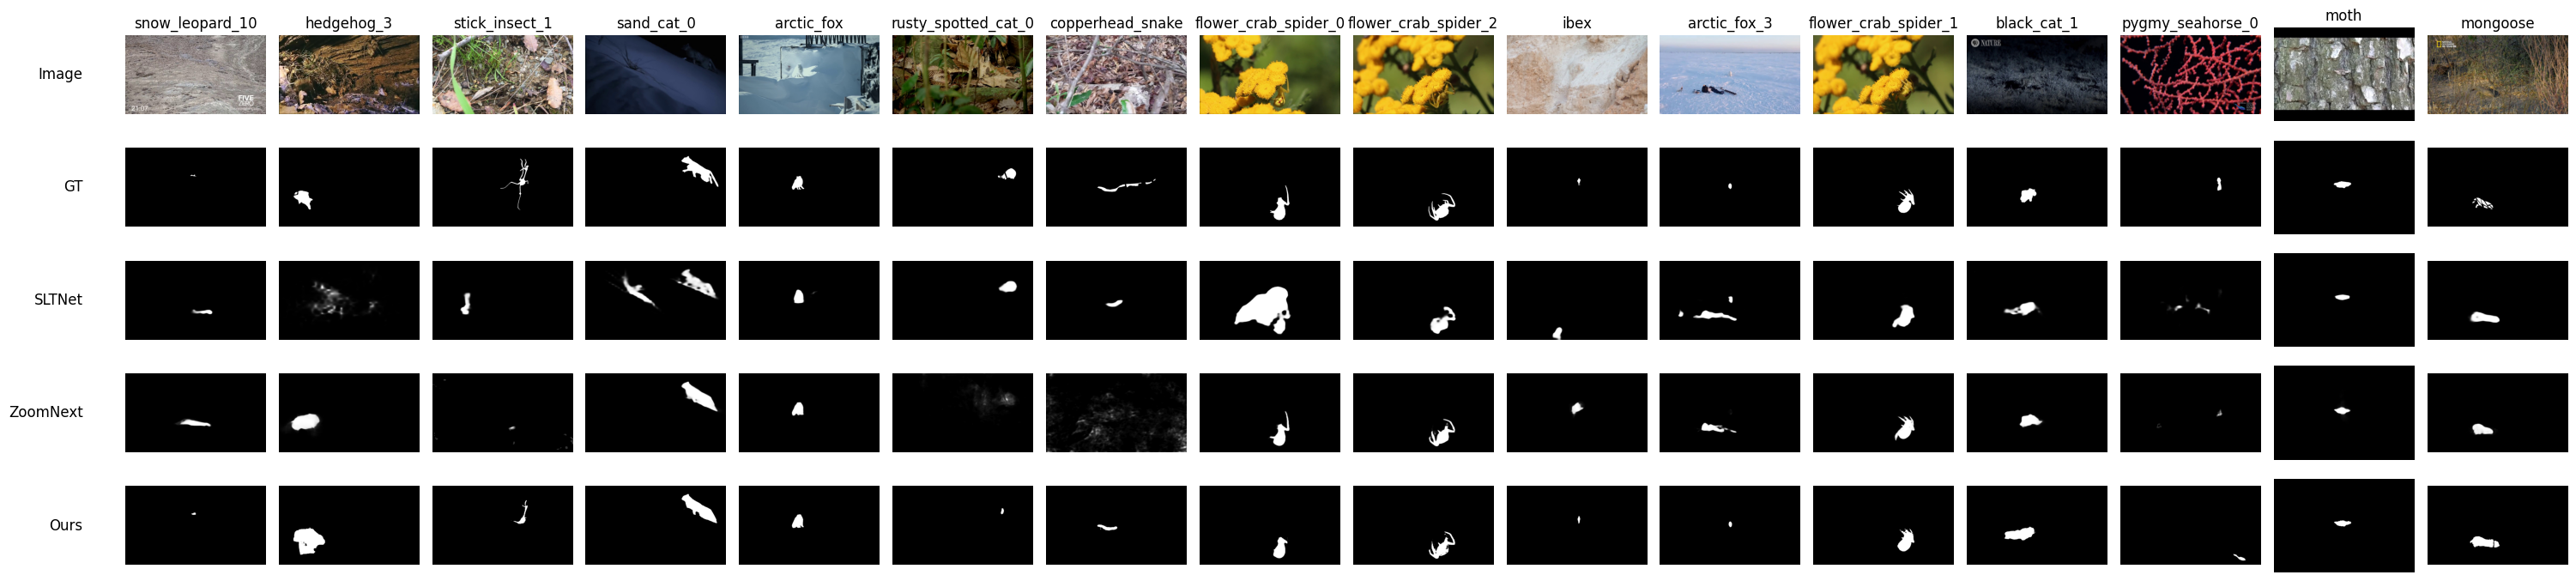

In [5]:
import pylab
import random
import numpy as np
import os
zoomnext_dir = "../../zoomnext_pvtv2b5_video/moca-mask-te/{}/Imgs"
sltnet_dir = "/mnt/fastdata/fullmoca/MoCA-Video-Test/{}/Pred"
gt_dir = "/mnt/fastdata/fullmoca/MoCA-Video-Test/{}/GT"
ours_dir = "../../full/full_0.09/{}/"
img_dir = "/mnt/fastdata/fullmoca/MoCA-Video-Test/{}/Frame"

all_videos = os.listdir("../../zoomnext_pvtv2b5_video/moca-mask-te/")
for _ in range(1):
    videos = np.random.choice(all_videos, 16, replace=False)
    all_videos = list(set(all_videos) - set(videos))
    
    fig, ax = pylab.subplots(5, 16, figsize=(30, 7))
    

    for i, video in enumerate(videos):
        all_images = sorted(os.listdir(os.path.join(zoomnext_dir.format(video))))
        
        ax[0, i].imshow(pylab.imread(os.path.join(img_dir.format(video), all_images[5].replace("png", "jpg"))))
        ax[0, i].set_title(video)
        ax[0, i].axis("off")
        
        ax[1, i].imshow(pylab.imread(os.path.join(gt_dir.format(video), all_images[5])), cmap="gray")
        ax[1, i].axis("off")
        
        ax[2, i].imshow(pylab.imread(os.path.join(sltnet_dir.format(video), all_images[5])), cmap="gray")
        ax[2, i].axis("off")
        
        ax[3, i].imshow(pylab.imread(os.path.join(zoomnext_dir.format(video), all_images[5])), cmap="gray")
        ax[3, i].axis("off")
        
        ax[4, i].imshow(pylab.imread(os.path.join(ours_dir.format(video), all_images[5])), cmap="gray")
        ax[4, i].axis("off")
            
    row_labels = ["Image", "GT", "SLTNet", "ZoomNext", "Ours"]
    for row in range(5):
        ax[row, 0].annotate(row_labels[row], xy=(-0.3, 0.5), xycoords='axes fraction',
                            fontsize=12, ha='right', va='center', rotation=0)
    # tight_layout
    fig.tight_layout()
    pylab.show()

In [10]:
path = "/home/wg25r/flowsam/no_tracking/min_0.05"
import os
import cv2
videos = os.listdir(path)
for video in videos:
    files = os.listdir(os.path.join(path, video))
    for file in files:
        img = cv2.imread(os.path.join(path, video, file))
        print(img.sum()) if img.sum()!=0 else 0

In [5]:
import pandas as pd
no_bgs = pd.read_csv("/home/wg25r/flowsam/SLT-Net/eval/no_bgs_0.13/no_bgs_0.13_TestDataset_per_sq_result.txt")
no_bgs[["(Dataset)", "wFm"]]

,(Dataset),wFm
0,(arctic_fox),0.927
1,(arctic_fox_3),0.909
2,(black_cat_1),0.480
3,(copperhead_snake),0.675
4,(flower_crab_spider_0),0.872
5,(flower_crab_spider_1),0.849
6,(flower_crab_spider_2),0.740
7,(hedgehog_3),0.589
8,(ibex),0.772
9,(mongoose),0.462


In [ ]:
import pandas as pd
no_bgs = pd.read_csv("/home/wg25r/flowsam/SLT-Net/eval/no_bgs_0.13/no_bgs_0.13_TestDataset_per_sq_result.txt")
no_bgs[["(Dataset)", "wFm"]]